In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm 
from malnis import show
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set(style = "whitegrid")

In [2]:
%matplotlib inline

In [3]:
folder = "/home/jarobyte/scratch/malnis_dataset/transformer/train_logs/"
files = sorted(os.listdir(folder))
files

['13770997_1.pkl',
 '13770997_2.pkl',
 '13771270_11.pkl',
 '13771270_4.pkl',
 '13771270_6.pkl',
 '13771270_9.pkl',
 '13773916_1.pkl',
 '13773916_10.pkl',
 '13773916_11.pkl',
 '13773916_12.pkl',
 '13773916_2.pkl',
 '13773916_3.pkl',
 '13773916_4.pkl',
 '13773916_5.pkl',
 '13773916_6.pkl',
 '13773916_7.pkl',
 '13773916_8.pkl',
 '13773916_9.pkl',
 '13789600_1.pkl',
 '13789600_10.pkl',
 '13789600_11.pkl',
 '13789600_12.pkl',
 '13789600_2.pkl',
 '13789600_3.pkl',
 '13789600_4.pkl',
 '13789600_5.pkl',
 '13789600_6.pkl',
 '13789600_7.pkl',
 '13789600_8.pkl',
 '13789600_9.pkl']

In [4]:
data = [pd.read_pickle(folder + x).assign(name = x) for x in tqdm(files)]

  0%|          | 0/30 [00:00<?, ?it/s]

In [5]:
data = pd.concat(data)
show(data)

(38004, 11)


,epoch,total_epochs,train_loss,dim_feedforward,attention_heads,num_layers,weight_decay,average_precision,roc_auc,training_minutes,name
0,1,2,0.094144,100,2,2,0,0.058133,0.634649,0.414513,13770997_1.pkl
1,2,2,0.085723,100,2,2,0,0.058133,0.634649,0.414513,13770997_1.pkl
0,1,2,0.093900,100,2,2,0,0.056471,0.635748,0.409955,13770997_2.pkl
1,2,2,0.085967,100,2,2,0,0.056471,0.635748,0.409955,13770997_2.pkl
0,1,500,0.093225,450,2,2,0,0.104642,0.665668,111.906559,13771270_11.pkl


In [6]:
data.total_epochs.max()

2000

In [7]:
data.training_minutes.max()

903.8111112919166

In [8]:
data.groupby("name").train_loss.min().sort_values().head()

name
13789600_11.pkl    0.000895
13789600_12.pkl    0.000977
13789600_2.pkl     0.001363
13789600_10.pkl    0.001619
13789600_5.pkl     0.001722
Name: train_loss, dtype: float64

In [9]:
data.groupby("name").roc_auc.mean().sort_values(ascending = False).head()

name
13771270_9.pkl     0.671604
13771270_6.pkl     0.671553
13771270_11.pkl    0.665668
13773916_5.pkl     0.664808
13771270_4.pkl     0.664446
Name: roc_auc, dtype: float64

In [10]:
data.groupby("name").average_precision.mean().sort_values(ascending = False).head()

name
13789600_9.pkl     0.132310
13789600_6.pkl     0.131856
13789600_4.pkl     0.131085
13773916_10.pkl    0.129900
13773916_9.pkl     0.129686
Name: average_precision, dtype: float64

# queries

In [11]:
best = data.query("name == '13773916_4.pkl'")
show(best)

(1000, 11)


,epoch,total_epochs,train_loss,dim_feedforward,attention_heads,num_layers,weight_decay,average_precision,roc_auc,training_minutes,name
0,1,1000,0.091847,200,4,4,0,0.129559,0.648803,432.24159,13773916_4.pkl
1,2,1000,0.085413,200,4,4,0,0.129559,0.648803,432.24159,13773916_4.pkl
2,3,1000,0.084553,200,4,4,0,0.129559,0.648803,432.24159,13773916_4.pkl
3,4,1000,0.084234,200,4,4,0,0.129559,0.648803,432.24159,13773916_4.pkl
4,5,1000,0.083986,200,4,4,0,0.129559,0.648803,432.24159,13773916_4.pkl


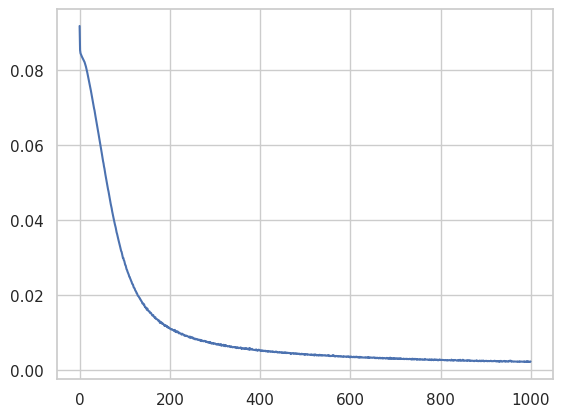

In [12]:
plt.plot(best.train_loss)

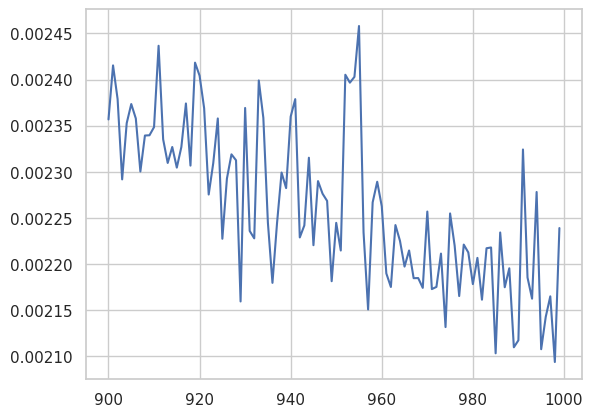

In [13]:
plt.plot(best.train_loss.iloc[-100:])

# metrics

In [18]:
data.groupby(["dim_feedforward", "num_layers"])\
.train_loss\
.min().unstack().round(4)\
.style.background_gradient(axis = None)

num_layers,2,3,4
dim_feedforward,,,
100,0.004900,0.002100,0.001000
150,0.018700,0.001800,nan
200,nan,nan,0.002100
250,0.004300,0.001700,0.002100
300,0.013500,nan,nan
350,nan,0.001600,0.001400
400,0.008700,0.003300,0.000900
450,0.014400,nan,nan
500,nan,nan,0.002300


In [19]:
data.groupby(["dim_feedforward", "num_layers"])\
.roc_auc\
.max().unstack().round(4)\
.style.background_gradient(axis = None)

num_layers,2,3,4
dim_feedforward,,,
100,0.657600,0.664800,0.603300
150,0.671600,0.654600,nan
200,nan,nan,0.653000
250,0.659600,0.664400,0.646200
300,0.664400,nan,nan
350,nan,0.643600,0.617200
400,0.653800,0.653800,0.647100
450,0.665700,nan,nan
500,nan,nan,0.658100


In [20]:
data.groupby(["dim_feedforward", "num_layers"])\
.average_precision\
.max().unstack().round(4)\
.style.background_gradient(axis = None)

num_layers,2,3,4
dim_feedforward,,,
100,0.105400,0.131900,0.120900
150,0.095400,0.132300,nan
200,nan,nan,0.129600
250,0.109800,0.129700,0.124600
300,0.099900,nan,nan
350,nan,0.128900,0.121100
400,0.105500,0.124100,0.127000
450,0.104600,nan,nan
500,nan,nan,0.129900


In [21]:
data.groupby(["dim_feedforward", "num_layers"])\
.training_minutes\
.max().unstack().round(4)\
.style.background_gradient(axis = None)

num_layers,2,3,4
dim_feedforward,,,
100,434.862400,630.915700,854.449200
150,102.837700,642.597000,nan
200,nan,nan,432.241600
250,449.154500,620.941700,410.001000
300,113.698300,nan,nan
350,nan,679.255200,856.978600
400,219.368100,323.013200,903.811100
450,111.906600,nan,nan
500,nan,nan,436.805900
